# Risk and tr(H^{-1}C)

We look on simulations how well does tr(H^{-1}C) correlate with the risk for least squares and logistic regression.

In [2]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 30

import copt as cp

Populating the interactive namespace from numpy and matplotlib


/usr/local/google/home/pedregosa/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


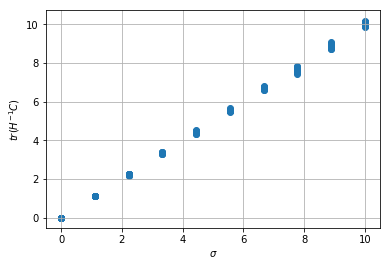

In [2]:
sigmas = np.linspace(1e-3, 10, 10)
all_ch = []
for sigma in sigmas:
    ch_tmp = []
    n_repeat = 10
    for _ in range(n_repeat):
        n_samples, n_features = 10000, 10
        X = np.random.randn(n_samples, n_features)
        w = np.random.randn(n_features)
        y = X.dot(w) + np.sqrt(sigma) * np.random.randn(n_samples)

        f = cp.utils.SquareLoss(X, y)
        opt = cp.minimize_PGD(f.f_grad, np.zeros(n_features), tol=1e-12)
#         print(np.linalg.norm(opt.x - w))

        C = np.zeros((n_features, n_features))
        for i in range(n_samples):
            C += np.outer(X[i], X[i]) * ((X[i].dot(w) - y[i]) ** 2) / n_samples


        H = np.zeros((n_features, n_features))
        for i in range(n_samples):
            H += np.outer(X[i], X[i]) / n_samples


        ch = np.trace(linalg.pinv(H).dot(C)) / n_features
        ch_tmp.append(ch)
    all_ch.append(ch_tmp)

ss = np.concatenate([np.ones(n_repeat) * s for s in sigmas])
plt.scatter(ss, np.array(all_ch))
plt.ylabel('$tr(H^{-1} C)$')
plt.xlabel('$\sigma$')
plt.grid()
plt.show()

# Now with logistic regression

In [10]:
from sklearn.linear_model import logistic
from tqdm import trange

sigmas = np.linspace(1e-3, 100, 100)
all_ch = []
all_gg = []
for it in trange(sigmas.size):
    sigma = sigmas[it]
    ch_tmp = []
    gg_tmp = []
    n_repeat = 10
    for _ in range(n_repeat):
        n_samples, n_features = 20000, 5
        X = np.random.randn(n_samples, n_features)
        w = np.random.randn(n_features)
        y = np.sign(X.dot(w) + sigma * np.random.logistic(size=n_samples))
        y[y < 0] = 0

        f = cp.utils.LogLoss(X, y, 1e-4)
        opt = cp.minimize_PGD(f.f_grad, np.zeros(n_features), tol=1e-12, max_iter=10000)

        C = np.zeros((n_features, n_features))
        for i in range(n_samples):
            grad_i = logistic._logistic_loss_and_grad(w, X[i].reshape((1, -1)), y[i], 0)[1]
            C += np.outer(grad_i, grad_i) / n_samples


        H_ = logistic._logistic_grad_hess(w, X, y, 0)[1]
        H = np.array([H_(np.eye(n_features)[i]) for i in range(n_features)]) / n_features

        
        ch = np.trace(linalg.pinv(H).dot(C)) / n_features
        ch_tmp.append(ch)
        
        gg_tmp.append(f(w))
    all_gg.append(gg_tmp)
    all_ch.append(ch_tmp)




  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:44<1:12:52, 44.17s/it]

  2%|▏         | 2/100 [01:02<59:18, 36.31s/it]  

  3%|▎         | 3/100 [01:19<49:33, 30.66s/it]

  4%|▍         | 4/100 [01:37<42:54, 26.82s/it]

  5%|▌         | 5/100 [01:54<37:55, 23.95s/it]

  6%|▌         | 6/100 [02:11<34:09, 21.81s/it]

  7%|▋         | 7/100 [02:28<31:44, 20.48s/it]

  8%|▊         | 8/100 [02:46<30:02, 19.59s/it]

  9%|▉         | 9/100 [03:04<29:03, 19.16s/it]

 10%|█         | 10/100 [03:22<28:10, 18.78s/it]

 11%|█         | 11/100 [03:39<27:04, 18.25s/it]

 12%|█▏        | 12/100 [04:03<29:15, 19.95s/it]

 13%|█▎        | 13/100 [04:21<28:01, 19.32s/it]

 14%|█▍        | 14/100 [04:39<27:23, 19.11s/it]/usr/local/google/home/pedregosa/DriveFileStream/My Drive/dev/copt/copt/proxgrad.py:130: RuntimeWarning: minimize_PGD did not reach the desired tolerance level
  RuntimeWarning)


 15%|█▌        | 15/100 [05:45<46:40, 32.95s/it]

 16%|█▌        | 16/100 [06:10<42:

 89%|████████▉ | 89/100 [42:53<05:19, 29.08s/it]/usr/local/google/home/pedregosa/DriveFileStream/My Drive/dev/copt/copt/proxgrad.py:130: RuntimeWarning: minimize_PGD did not reach the desired tolerance level
  RuntimeWarning)
/usr/local/google/home/pedregosa/DriveFileStream/My Drive/dev/copt/copt/proxgrad.py:130: RuntimeWarning: minimize_PGD did not reach the desired tolerance level
  RuntimeWarning)


 90%|█████████ | 90/100 [44:54<09:24, 56.43s/it]/usr/local/google/home/pedregosa/DriveFileStream/My Drive/dev/copt/copt/proxgrad.py:130: RuntimeWarning: minimize_PGD did not reach the desired tolerance level
  RuntimeWarning)


 91%|█████████ | 91/100 [45:58<08:50, 58.94s/it]

 92%|█████████▏| 92/100 [46:16<06:11, 46.46s/it]

 93%|█████████▎| 93/100 [46:44<04:46, 40.91s/it]

 94%|█████████▍| 94/100 [47:36<04:26, 44.38s/it]

 95%|█████████▌| 95/100 [47:58<03:08, 37.72s/it]

 96%|█████████▌| 96/100 [48:16<02:06, 31.69s/it]

 97%|█████████▋| 97/100 [48:33<01:22, 27.42s/it]

 98%|█████████▊|

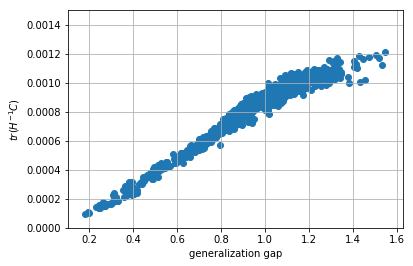

In [9]:
ss = np.concatenate([np.ones(n_repeat) * s for s in sigmas])
plt.scatter(all_gg, np.array(all_ch))
plt.ylabel('$tr(H^{-1} C)$')
plt.xlabel('generalization gap')
plt.ylim((0, 0.0015))
plt.grid()
plt.show()